<a href="https://colab.research.google.com/github/Vicrisfell/minerecaodedados/blob/main/Trabalho_banco_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonte dos dados: https://www.kaggle.com/datasets/abcsds/pokemo
 Pokémon com estatísticas e tipos


1. Classificação: Prever se um Pokémon é Lendário.

📌 Objetivo: Criar um modelo que preveja se um Pokémon é Lendário ou Não com base nos seus atributos.

🔹 Atributos usados:

HP, Ataque, Defesa, Sp. Atk, Sp. Def, Velocidade (estatísticas gerais)
Geração (Pokémons de gerações mais antigas são mais lendários?)
Tipo 1 e Tipo 2 (certos tipos têm mais chances de serem lendários?)

📈 Algoritmos possíveis:

✅ Árvore de Decisão

✅ Random Forest

✅ KNN (K-Nearest Neighbors)

🎯 Aplicação real: Esse modelo pode ser usado para prever se um novo Pokémon pode ser considerado lendário baseado em suas estatísticas.

⚡ 2. Regressão: Prever o Total de Pontos de um Pokémon

📌 Objetivo: Criar um modelo que estime o Total de Pontos de um Pokémon com base nos seus atributos.

🔹 Atributos usados:

HP, Ataque, Defesa, Sp. Atk, Sp. Def, Velocidade
Tipo 1 e Tipo 2
Geração

📈 Algoritmos possíveis:

✅ Regressão Linear

✅ XGBoost

✅ Redes Neurais

🎯 Aplicação real: Ajuda a prever o balanceamento de um novo Pokémon antes de ele ser lançado nos jogos.

🏷️ 3. Agrupamento: Categorizar Pokémon em Classes Baseadas em Estatísticas
📌 Objetivo: Agrupar os Pokémon com base em suas estatísticas e descobrir perfis de Pokémon.

🔹 Atributos usados:

HP, Ataque, Defesa, Sp. Atk, Sp. Def, Velocidade

📈 Algoritmos possíveis:

✅ K-Means

✅ DBSCAN

✅ Hierarchical Clustering

🎯 Aplicação real: Podemos identificar categorias como tanques, atacantes, velozes, ajudando na criação de times equilibrados nos jogos.

🔗 4. Associação: Encontrar Relações Entre os Tipos de Pokémon

📌 Objetivo: Descobrir quais combinações de tipos são mais comuns e quais são mais raras.

🔹 Atributos usados:

Tipo 1 e Tipo 2

📈 Algoritmos possíveis:

✅ Apriori

✅ FP-Growth

🎯 Aplicação real: Pode ajudar na criação de novas combinações de tipos nos jogos Pokémon.

ID para cada pokemon
Nome : Nome de cada pokemon,

Tipo 1 : Cada pokémon tem um tipo, isso determina a fraqueza/resistência a ataques

Tipo 2 : Alguns pokémons são do tipo duplo e têm 2

Total : soma de todas as estatísticas que vêm depois disso, um guia geral de quão forte um pokémon é

HP : pontos de vida, ou saúde, define quanto dano um pokémon pode suportar antes de desmaiar

Ataque : o modificador base para ataques normais (por exemplo, Arranhões, Socos)

Defesa : a resistência básica a danos contra ataques normais

SP Atk : ataque especial, o modificador base para ataques especiais (por exemplo, explosão de fogo, raio de bolha)

SP Def : a resistência base a danos contra ataques especiais
Velocidade : determina qual pokémon ataca primeiro em cada rodada

Nomes dos colaboradores: Kauan Martin Bonfim, Thiago dos Santos Rodrigues, Vitor Cristiano Fellizatti,

Importando os Pacotes necessários

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Carregar o dataset


In [5]:
pokemon = pd.read_csv('/content/Pokemon.csv') # Carregar o dataset
pokemon.head(50) # Exibir as primeiras 50 linhas


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [75]:
pokemon.info() # Verificar informações gerais do dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Pre-Processamento

In [11]:
pokemon #Traz as informações


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [76]:
print(pokemon.isnull().sum()) # Contar valores ausentes em cada coluna

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [77]:
print(pokemon.describe()) # Exibir estatísticas descritivas dos atributos numéricos

                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.0000

assim conseguimos entender melhor as informações


Limpeza de numeros nulo

In [78]:
pokemon_num = pokemon.select_dtypes(include=['number']) # Selecionar apenas as colunas numéricas
pokemon_num.fillna(pokemon_num.mean(), inplace=True) # Preencher os valores nulos com a média das colunas numéricas
pokemon.update(pokemon_num) # Atualizar o DataFrame original com os valores preenchidos


In [19]:
pokemon.fillna(pokemon.mode().iloc[0], inplace=True) # Preencher valores categóricos ausentes com a moda (valor mais frequente)

In [79]:
print(pokemon.columns)


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [80]:
pokemon.columns = pokemon.columns.str.strip()  # Remove espaços extras


In [81]:
pokemon.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [82]:
pokemon["Type 2"].fillna("None", inplace=True)

<ipython-input-82-d2b85ee17c28>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemon["Type 2"].fillna("None", inplace=True)


In [83]:
pokemon.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,0
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


Converter variáveis categóricas

In [74]:
pokemon = pd.read_csv('Pokemon1.csv')

Classificação - Random Forest

In [98]:
# Selecionar atributos e alvo
X = pokemon.drop(columns=["Legendary", "Name"])  # Features
y = pokemon["Legendary"]  # Target

# Aplicar One-Hot Encoding para as colunas categóricas
X = pd.get_dummies(X, columns=["Type 1", "Type 2"], drop_first=True)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selecionar apenas as colunas numéricas
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Guardar os nomes das colunas numéricas para substituição posterior
numeric_columns = X_train_numeric.columns

# Normalizar as colunas numéricas
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train_numeric)
X_test_numeric = scaler.transform(X_test_numeric)

# Substituir as colunas numéricas normalizadas de volta no X_train e X_test
X_train[numeric_columns] = X_train_numeric
X_test[numeric_columns] = X_test_numeric

# Treinar o modelo com os dados normalizados
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)





RandomForestClassifier(random_state=42)

In [99]:
# Verificar a acurácia do modelo
accuracy = model.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.9688


In [106]:
# Gerar a matriz de confusão
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)


Matriz de Confusão:
[[146   4]
 [  1   9]]


Aqui:

O número 35 é o número de Pokémon não lendários corretamente classificados.
O número 34 é o número de Pokémon lendários corretamente classificados.
O número 5 e 6 são os falsos positivos e falsos negativos, respectivamente.

In [108]:
# Gerar o relatório de classificação
report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(report)


Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       150
        True       0.69      0.90      0.78        10

    accuracy                           0.97       160
   macro avg       0.84      0.94      0.88       160
weighted avg       0.97      0.97      0.97       160



Ao final, o que você verá são as métricas de desempenho que indicam quão bem o modelo classificou os Pokémon como "Lendários" ou "Não Lendários" com base nas características dos dados de entrada.


In [85]:
print(pokemon.columns)


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


 Agrupamento - K-Means

In [86]:
# Selecionar apenas atributos de batalha
X_cluster = pokemon[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

In [87]:
# Normalizar os dados
scaler = StandardScaler()
X_cluster = scaler.fit_transform(X_cluster)

In [88]:
# Aplicar K-Means com 3 grupos
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pokemon['Cluster'] = kmeans.fit_predict(X_cluster)


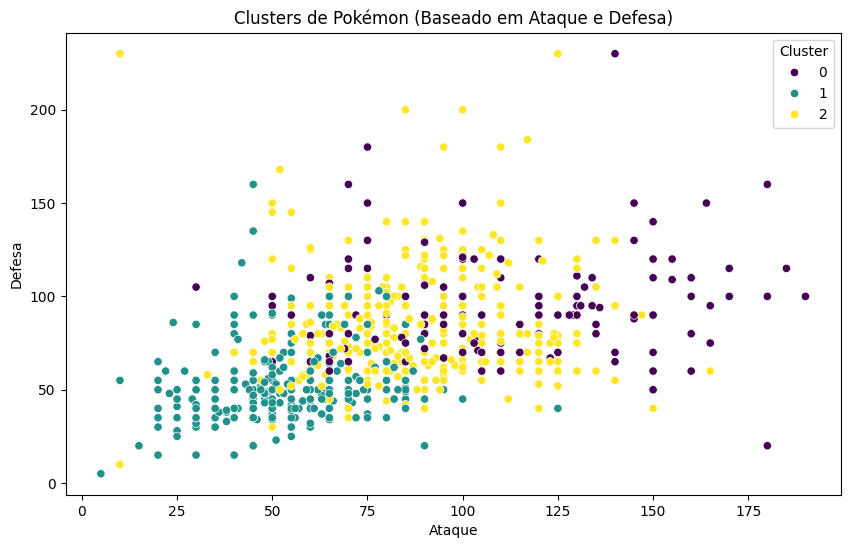

In [89]:
# Visualizar os grupos
plt.figure(figsize=(10,6))
sns.scatterplot(x=pokemon['Attack'], y=pokemon['Defense'], hue=pokemon['Cluster'], palette='viridis')
plt.title("Clusters de Pokémon (Baseado em Ataque e Defesa)")
plt.xlabel("Ataque")
plt.ylabel("Defesa")
plt.show()

Objetivo: Identificar grupos de Pokémon com estatísticas semelhantes.